In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

plt.style.use('ggplot')
plt.style.use('seaborn-bright')

In [2]:
voice_usage_info = pd.read_excel("data/1.2 Voice Incoming - Offnet-Onnet.xlsx")
voice_usage_info

,event_source.hash,call_count,call_duration,ym
0,5c0675dd126f9676f4543d962e8c8ff9,50.0,7053.0,202105.0
1,c633f89a00366eff6289647e09b55052,33.0,2907.0,202103.0
2,46d8a61a663aaf0520177c573b1e81ef,17.0,3387.0,202105.0
3,5c0675dd126f9676f4543d962e8c8ff9,66.0,5966.0,202011.0
4,c633f89a00366eff6289647e09b55052,37.0,2455.0,202105.0
...,...,...,...,...
452199,2d274203c67cde38bafaf74f5ce33da6,79.0,5218.0,202101.0
452200,888f8f4553b8d4786897c87f926be9bd,26.0,5121.0,202103.0
452201,3f2285a95d1061785fe63cff043bdc43,19.0,921.0,202102.0
452202,3f2285a95d1061785fe63cff043bdc43,39.0,3716.0,202103.0


In [3]:
# Handle null values
# Drop unnecessary cols
# Pivot by monthYear
# Usage rating call count/Duration - bucketizing/ add rating cols
# location grouping/bucketizing (consider 4 location cols)
# User profile dim table
# visualize and analyze data

In [3]:
voice_usage_info = voice_usage_info.drop_duplicates(["event_source.hash","ym"], keep="last")
voice_usage_info.shape

(452204, 4)

In [7]:
voice_usage_info.rename(columns={'call_duration': 'duration','ym':'year-month'}, inplace=True)
voice_usage_info.dropna(subset=["duration","call_count"],inplace=True)

In [9]:
voice_usage_info['duration'].fillna(0)
voice_usage_info['call_count'].fillna(0)

0         50.0
1         33.0
2         17.0
3         66.0
4         37.0
          ... 
452199    79.0
452200    26.0
452201    19.0
452202    39.0
452203    25.0
Name: call_count, Length: 431676, dtype: float64

In [10]:
voice_usage_info.isnull().sum(axis=0)

event_source.hash    0
call_count           0
duration             0
year-month           0
dtype: int64

In [11]:
voice_usage_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 431676 entries, 0 to 452203
Data columns (total 4 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   event_source.hash  431676 non-null  object 
 1   call_count         431676 non-null  float64
 2   duration           431676 non-null  float64
 3   year-month         431676 non-null  float64
dtypes: float64(3), object(1)
memory usage: 16.5+ MB


# Phase 1

## Usage Ranking

- 1. Pivot by year-month
- 2. Bin by Call count/Duration
- 3. Usage Rank
- 4. Labling usage

In [13]:
pivot_voice_usage_info = pd.pivot_table(voice_usage_info,index=['event_source.hash'],columns=['year-month'], aggfunc=np.sum, fill_value=0)
pivot_voice_usage_info

call_count                             \
year-month                         202011.0 202012.0 202101.0 202102.0   
event_source.hash                                                        
59186358517212700922248718974976         12       30       23       18   
000084a38b0fa5ca77e7989aa5eb2d06         44       78       97       54   
0000b72cb5dd05389b70e07ae2eaebd9        168      151      165      155   
0000d6128ae38e7c002db48acdb1515d         26       14       11       77   
0001220457bf95593a9f85d1a00aaa8b          0        0        0        0   
...                                     ...      ...      ...      ...   
fffc95756b7dccbd011d78c8a7d41e6b          0        0        0        0   
fffdd1950a0cc6eb6e701bb732abadac         17       13       29       34   
fffdede40561fb7b84c4c3941dec8e79         42       50       44       33   
fffe637a366b3a25df9fbe75aea241b1          0        0        0        0   
fffec93ce3fdf1421bce8728acdb866c         33       53       34       28   

                                                                               \
year-month                       202103.0 202104.0 202105.0 202106.0 202107.0   
event_source.hash                                                               
59186358517212700922248718974976       16       12        9        9       19   
000084a38b0fa5ca77e7989aa5eb2d06       55       51       51       24       24   
0000b72cb5dd05389b70e07ae2eaebd9      282      205      190      203      237   
0000d6128ae38e7c002db48acdb1515d       21       12        9       19       11   
0001220457bf95593a9f85d1a00aaa8b        0        0        0       34       31   
...                                   ...      ...      ...      ...      ...   
fffc95756b7dccbd011d78c8a7d41e6b        0        0        0        0       21   
fffdd1950a0cc6eb6e701bb732abadac       22       39       24       21       35   
fffdede40561fb7b84c4c3941dec8e79       81       32       59       29       57   
fffe637a366b3a25df9fbe75aea241b1        0        0        0        5       11   
fffec93ce3fdf1421bce8728acdb866c       62       56       69       85       89   

                                 duration                                      \
year-month                       202011.0 202012.0 202101.0 202102.0 202103.0   
event_source.hash                                                               
59186358517212700922248718974976     1589     1834     1758     1999      867   
000084a38b0fa5ca77e7989aa5eb2d06     5362     5226     7139     3975     5470   
0000b72cb5dd05389b70e07ae2eaebd9    25504    26708    27991    25353    46238   
0000d6128ae38e7c002db48acdb1515d     1376     1382      418     5001      996   
0001220457bf95593a9f85d1a00aaa8b        0        0        0        0        0   
...                                   ...      ...      ...      ...      ...   
fffc95756b7dccbd011d78c8a7d41e6b        0        0        0        0        0   
fffdd1950a0cc6eb6e701bb732abadac     4066     8274     5194     9872     7179   
fffdede40561fb7b84c4c3941dec8e79     3553     3553     4404     2900     3908   
fffe637a366b3a25df9fbe75aea241b1        0        0        0        0        0   
fffec93ce3fdf1421bce8728acdb866c     2588     6513     3303     2563     5914   

                                                                      
year-month                       202104.0 202105.0 202106.0 202107.0  
event_source.hash                                                     
59186358517212700922248718974976      882      555      358     2266  
000084a38b0fa5ca77e7989aa5eb2d06     4750     4796      896     1630  
0000b72cb5dd05389b70e07ae2eaebd9    29276    29116    32889    39938  
0000d6128ae38e7c002db48acdb1515d      589     1081      853     1034  
0001220457bf95593a9f85d1a00aaa8b        0        0     1961     1994  
...                                   ...      ...      ...      ...  
fffc95756b7dccbd011d78c8a7d41e6b        0        0        0     2568  
fffdd1950a0cc6eb

In [14]:
# check for all zero cols
pivot_voice_usage_info.loc[pivot_voice_usage_info.index == 0.0]

Empty DataFrame
Columns: [(call_count, 202011.0), (call_count, 202012.0), (call_count, 202101.0), (call_count, 202102.0), (call_count, 202103.0), (call_count, 202104.0), (call_count, 202105.0), (call_count, 202106.0), (call_count, 202107.0), (duration, 202011.0), (duration, 202012.0), (duration, 202101.0), (duration, 202102.0), (duration, 202103.0), (duration, 202104.0), (duration, 202105.0), (duration, 202106.0), (duration, 202107.0)]
Index: []

In [15]:
pivot_voice_usage_info.columns

MultiIndex([('call_count', 202011.0),
            ('call_count', 202012.0),
            ('call_count', 202101.0),
            ('call_count', 202102.0),
            ('call_count', 202103.0),
            ('call_count', 202104.0),
            ('call_count', 202105.0),
            ('call_count', 202106.0),
            ('call_count', 202107.0),
            (  'duration', 202011.0),
            (  'duration', 202012.0),
            (  'duration', 202101.0),
            (  'duration', 202102.0),
            (  'duration', 202103.0),
            (  'duration', 202104.0),
            (  'duration', 202105.0),
            (  'duration', 202106.0),
            (  'duration', 202107.0)],
           names=[None, 'year-month'])

In [16]:
pivot_voice_usage_info.describe().apply(lambda s: s.apply('{0:.5f}'.format))

call_count                                                      \
year-month     202011.0     202012.0     202101.0     202102.0     202103.0   
count       59546.00000  59546.00000  59546.00000  59546.00000  59546.00000   
mean           30.35764     35.48658     37.10543     33.51763     38.27292   
std            65.20379     76.22944     74.95570     68.00401     78.57476   
min             0.00000      0.00000      0.00000      0.00000      0.00000   
25%             1.00000      1.00000      2.00000      2.00000      2.00000   
50%            13.00000     16.00000     18.00000     16.00000     18.00000   
75%            39.00000     46.00000     48.00000     43.00000     49.00000   
max          4252.00000   5636.00000   4088.00000   3401.00000   4029.00000   

                                                                    duration  \
year-month     202104.0     202105.0     202106.0     202107.0      202011.0   
count       59546.00000  59546.00000  59546.00000  59546.00000   59546.00000   
mean           36.05500     30.86728     28.98672     45.38305    3633.00385   
std            69.18989     65.00745     67.93487     98.40914    6669.88537   
min             0.00000      0.00000      0.00000      0.00000       0.00000   
25%             2.00000      2.00000      2.00000      4.00000      17.00000   
50%            18.00000     14.00000     13.00000     21.00000    1229.00000   
75%            48.00000     40.00000     36.00000     57.00000    4514.00000   
max          3783.00000   3752.00000   5054.00000   5358.00000  263196.00000   

                                                                    \
year-month      202012.0      202101.0      202102.0      202103.0   
count        59546.00000   59546.00000   59546.00000   59546.00000   
mean          3897.41581    4074.07722    3594.96611    3983.58318   
std           7137.26926    7202.98481    6498.97508    7281.97955   
min              0.00000       0.00000       0.00000       0.00000   
25%             45.00000      64.00000      64.00000      99.00000   
50%           1425.00000    1524.50000    1323.00000    1500.50000   
75%           4873.00000    5188.00000    4508.00000    5004.75000   
max         302323.00000  294419.00000  286776.00000  329376.00000   

                                                                    
year-month      202104.0      202105.0      202106.0      202107.0  
count        59546.00000   59546.00000   59546.00000   59546.00000  
mean          3791.39284    4003.02682    3689.55485    5215.18760  
std           6635.73134    7286.93763    7110.53475    9629.55930  
min              0.00000       0.00000       0.00000       0.00000  
25%             93.00000      70.00000      75.00000     199.00000  
50%           1463.50000    1348.00000    1186.50000    1913.00000  
75%           4862.00000    4915.00000    4454.00000    6383.00000  
max         318527.00000  268068.00000  348752.00000  418971.00000

In [18]:
voice_usage_info.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,call_count,duration,year-month
count,431676.00000,431676.00000,431676.00000
mean,43.59394,4949.64273,202084.31495
std,80.78611,7881.95128,37.94792
min,1.00000,1.00000,202011.00000
25%,9.00000,657.00000,202101.00000
50%,25.00000,2431.00000,202103.00000
75%,54.00000,6186.00000,202105.00000
max,5636.00000,418971.00000,202107.00000


In [20]:
# Freedman-Diaconis’s Rule for binnig
hist_values = np.histogram_bin_edges(voice_usage_info["call_count"].values,bins="fd")
hist_values

array([1.00000000e+00, 2.19082840e+00, 3.38165680e+00, ...,
       5.63361834e+03, 5.63480917e+03, 5.63600000e+03])

In [21]:
# binning call_count
count_bins = [0, 10, 26, 55,300,800,2000,3500, 5636]
for col in pivot_voice_usage_info['call_count'].columns:
    pivot_voice_usage_info['call_count'][col] = np.searchsorted(count_bins, pivot_voice_usage_info['call_count'][col].values)
pivot_voice_usage_info['call_count']

<ipython-input-21-66f38837097b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pivot_voice_usage_info['call_count'][col] = np.searchsorted(count_bins, pivot_voice_usage_info['call_count'][col].values)


year-month,202011.0,202012.0,202101.0,202102.0,202103.0,202104.0,202105.0,202106.0,202107.0
event_source.hash,,,,,,,,,
59186358517212700922248718974976,2,3,2,2,2,2,1,1,2
000084a38b0fa5ca77e7989aa5eb2d06,3,4,4,3,3,3,3,2,2
0000b72cb5dd05389b70e07ae2eaebd9,4,4,4,4,4,4,4,4,4
0000d6128ae38e7c002db48acdb1515d,2,2,2,4,2,2,1,2,2
0001220457bf95593a9f85d1a00aaa8b,0,0,0,0,0,0,0,3,3
...,...,...,...,...,...,...,...,...,...
fffc95756b7dccbd011d78c8a7d41e6b,0,0,0,0,0,0,0,0,2
fffdd1950a0cc6eb6e701bb732abadac,2,2,3,3,2,3,2,2,3
fffdede40561fb7b84c4c3941dec8e79,3,3,3,3,4,3,4,3,4


In [22]:
# binning duration
duration_bins = [0, 660, 2450, 6200,12400,24800,50600,200000,418971]
for col in pivot_voice_usage_info['duration'].columns:
    pivot_voice_usage_info['duration'][col] = np.searchsorted(duration_bins, pivot_voice_usage_info['duration'][col].values)
pivot_voice_usage_info['duration']

<ipython-input-22-70e434fc01a6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pivot_voice_usage_info['duration'][col] = np.searchsorted(duration_bins, pivot_voice_usage_info['duration'][col].values)


year-month,202011.0,202012.0,202101.0,202102.0,202103.0,202104.0,202105.0,202106.0,202107.0
event_source.hash,,,,,,,,,
59186358517212700922248718974976,2,2,2,2,2,2,1,1,2
000084a38b0fa5ca77e7989aa5eb2d06,3,3,4,3,3,3,3,2,2
0000b72cb5dd05389b70e07ae2eaebd9,6,6,6,6,6,6,6,6,6
0000d6128ae38e7c002db48acdb1515d,2,2,1,3,2,1,2,2,2
0001220457bf95593a9f85d1a00aaa8b,0,0,0,0,0,0,0,2,2
...,...,...,...,...,...,...,...,...,...
fffc95756b7dccbd011d78c8a7d41e6b,0,0,0,0,0,0,0,0,3
fffdd1950a0cc6eb6e701bb732abadac,3,4,3,4,4,4,4,3,3
fffdede40561fb7b84c4c3941dec8e79,3,3,3,3,3,2,3,3,3


In [23]:
year_month_list = pivot_voice_usage_info['call_count'].columns

In [24]:
# multplying bins to get usage rating
for col in year_month_list:
    pivot_voice_usage_info[col] = pivot_voice_usage_info['call_count'][col]  * pivot_voice_usage_info['duration'][col]

### Justification
- 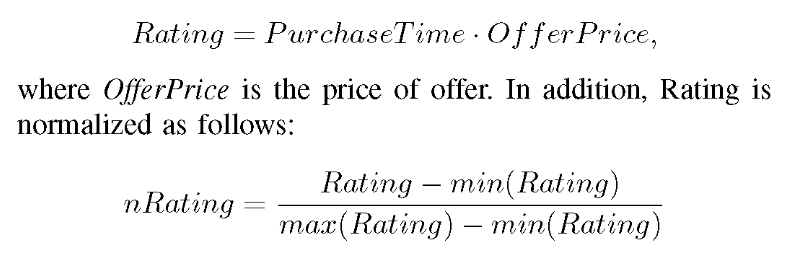https://doi.org/10.1109/ICCE48956.2021.9352111, 2021  (Pham, C. D., Anh Chu, T., Pham, H. H., Linh Dao, M., Pham, T. S., Hung Trinh, V., & Nguyen, D. H. A recommendation system for offers in telecommunications)
- http://www.utstat.toronto.edu/~brunner/DataAnalysisText/Interactions.pdf

### More advanced methods
- Dimension reduction approaches?

### Usage ratings for year-month

In [25]:
pivot_voice_usage_info = pivot_voice_usage_info.drop(['call_count','duration'], axis=1)
pivot_voice_usage_info

,202011.0,202012.0,202101.0,202102.0,202103.0,202104.0,202105.0,202106.0,202107.0
year-month,,,,,,,,,
event_source.hash,,,,,,,,,
59186358517212700922248718974976,4,6,4,4,4,4,1,1,4
000084a38b0fa5ca77e7989aa5eb2d06,9,12,16,9,9,9,9,4,4
0000b72cb5dd05389b70e07ae2eaebd9,24,24,24,24,24,24,24,24,24
0000d6128ae38e7c002db48acdb1515d,4,4,2,12,4,2,2,4,4
0001220457bf95593a9f85d1a00aaa8b,0,0,0,0,0,0,0,6,6
...,...,...,...,...,...,...,...,...,...
fffc95756b7dccbd011d78c8a7d41e6b,0,0,0,0,0,0,0,0,6
fffdd1950a0cc6eb6e701bb732abadac,6,8,9,12,8,12,8,6,9


In [26]:
pivot_voice_usage_info.T.reset_index(drop=True).T
pivot_voice_usage_info.columns=year_month_list

In [27]:
# scaling usage rating
scaler = MinMaxScaler()
for col in year_month_list:
    pivot_voice_usage_info[col] = scaler.fit_transform(pivot_voice_usage_info[col].values.reshape(-1,1))

<AxesSubplot:xlabel='year-month', ylabel='event_source.hash'>

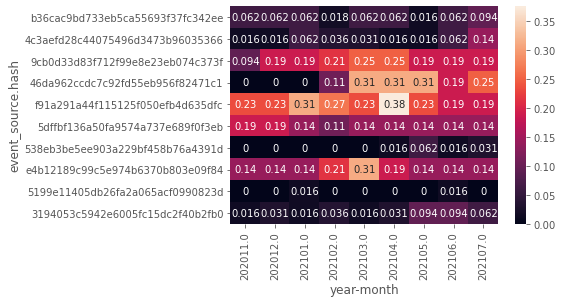

In [28]:
sns.heatmap(pivot_voice_usage_info[year_month_list].sample(n=10), annot=True)

In [29]:
pivot_voice_usage_info['Usage_Rating_Scaled'] = pivot_voice_usage_info[year_month_list].sum(axis=1)/len(year_month_list)
pivot_voice_usage_info

year-month,202011.0,202012.0,202101.0,202102.0,202103.0,202104.0,202105.0,202106.0,202107.0,Usage_Rating_Scaled
event_source.hash,,,,,,,,,,
59186358517212700922248718974976,0.062500,0.093750,0.062500,0.071429,0.062500,0.062500,0.015625,0.015625,0.062500,0.056548
000084a38b0fa5ca77e7989aa5eb2d06,0.140625,0.187500,0.250000,0.160714,0.140625,0.140625,0.140625,0.062500,0.062500,0.142857
0000b72cb5dd05389b70e07ae2eaebd9,0.375000,0.375000,0.375000,0.428571,0.375000,0.375000,0.375000,0.375000,0.375000,0.380952
0000d6128ae38e7c002db48acdb1515d,0.062500,0.062500,0.031250,0.214286,0.062500,0.031250,0.031250,0.062500,0.062500,0.068948
0001220457bf95593a9f85d1a00aaa8b,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.093750,0.093750,0.020833
...,...,...,...,...,...,...,...,...,...,...
fffc95756b7dccbd011d78c8a7d41e6b,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.093750,0.010417
fffdd1950a0cc6eb6e701bb732abadac,0.093750,0.125000,0.140625,0.214286,0.125000,0.187500,0.125000,0.093750,0.140625,0.138393
fffdede40561fb7b84c4c3941dec8e79,0.140625,0.140625,0.140625,0.160714,0.187500,0.093750,0.187500,0.140625,0.187500,0.153274


### Finding Outliers

<AxesSubplot:>

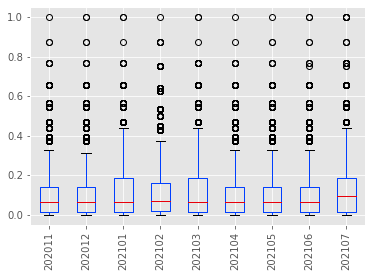

In [30]:
pivot_voice_usage_info.boxplot(column=[int(x) for x in year_month_list], rot=90)

<AxesSubplot:ylabel='year-month'>

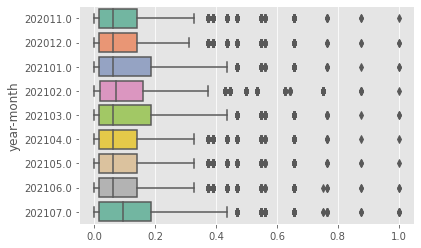

In [31]:
ax = sns.boxplot(data=pivot_voice_usage_info[[int(x) for x in year_month_list]], orient="h", palette="Set2")
ax

<AxesSubplot:ylabel='Density'>

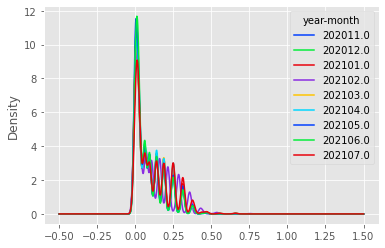

In [32]:
pivot_voice_usage_info[[int(x) for x in year_month_list]].plot(kind = 'density') 

## Three quantitative methods commonly used in statistics for the detection of univariate outliers:
- Tukey’s box plot method
- Internally studentized residuals (AKA z-score method)
- Median Absolute Deviation method

### 1) Tukey’s box plot method
- Tukey distinguishes between possible and probable outliers. A possible outlier is located between the inner and the outer fence, whereas a probable outlier is located outside the outer fence.    
    
- IQR =Q3 - Q1, whereas q3 := 75th quartile and q1 := 25th quartile
- Inner fence = [Q1-1.5*IQR, Q3+1.5*IQR]
- Outer fence = [Q1–3*IQR, Q3+3*IQR]

In [33]:
#Tukey's method
def tukeys_method(df, variable):
    #Takes two parameters: dataframe & variable of interest as string
    q1 = df[variable].quantile(0.25)
    q3 = df[variable].quantile(0.75)
    iqr = q3-q1
    inner_fence = 1.5*iqr
    outer_fence = 3*iqr
    
    #inner fence lower and upper end
    inner_fence_le = q1-inner_fence
    inner_fence_ue = q3+inner_fence
    
    #outer fence lower and upper end
    outer_fence_le = q1-outer_fence
    outer_fence_ue = q3+outer_fence
    
    outliers_prob = []
    outliers_poss = []
    outliers_prob_indexes = []
    outliers_poss_indexes = []
    for index, x in enumerate(df[variable]):
        if x <= outer_fence_le or x >= outer_fence_ue:
            outliers_prob_indexes.append(index)
            outliers_prob.append(x)
    for index, x in enumerate(df[variable]):
        if x <= inner_fence_le or x >= inner_fence_ue:
            outliers_poss_indexes.append(index)
            outliers_poss.append(x)
    # returns indexes of the rows with outliers
    return outliers_prob, outliers_prob_indexes, outliers_poss, outliers_poss_indexes

In [34]:
pr_col_threshold = []
po_col_threshold = []
for col in year_month_list:
    pr_col, pr_col_indexes, po_col, po_col_indexes = tukeys_method(pivot_voice_usage_info, int(col))
    pr_col_threshold.append({col: {"threshold": min(pr_col), "count": len(pr_col)}})
    po_col_threshold.append({col: {"threshold": min(po_col), "count": len(po_col)}})
    print()
    print(f"Probable Outliers for {col}---->\n", pr_col)
    print(len(pr_col))
    print()
    print(f"Possible Outliers for {col}----->\n", po_col)
    print(len(po_col))
    print()


Probable Outliers for 202011.0---->
 [0.65625, 0.546875, 0.546875, 0.5625, 0.765625, 0.65625, 0.546875, 0.875, 0.65625, 0.546875, 0.546875, 1.0, 0.5625, 0.5625, 0.546875, 0.65625, 0.65625, 0.65625, 0.546875, 0.65625, 0.5625, 0.65625, 0.65625, 0.546875, 0.546875, 0.546875, 0.65625, 0.546875, 0.546875, 0.546875, 0.65625, 0.546875, 0.5625, 0.65625, 0.65625, 0.5625, 0.546875, 0.546875, 0.546875, 0.546875, 0.5625, 0.765625, 0.546875, 0.65625, 0.65625, 0.546875, 0.65625, 0.65625, 0.546875, 0.546875, 0.65625, 0.875, 0.65625, 0.546875, 0.65625, 0.5625, 0.546875, 0.65625, 0.5625, 0.5625, 0.765625, 0.5625, 0.546875, 0.65625, 0.5625, 0.765625, 0.5625, 0.65625, 0.65625, 0.65625, 0.765625, 0.5625, 0.546875, 0.5625, 0.65625, 0.546875, 0.5625, 0.546875, 0.546875, 0.65625, 0.65625, 0.5625, 0.65625, 0.65625, 0.546875]
85

Possible Outliers for 202011.0----->
 [0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.65625, 0.46875, 0.46875, 0.375, 0.375, 0.375, 0.375, 0.546875, 0.375, 0.375, 0


Probable Outliers for 202103.0---->
 [0.765625, 0.765625, 0.765625, 0.765625, 1.0, 1.0, 0.875, 0.765625, 0.765625, 0.765625, 0.765625]
11

Possible Outliers for 202103.0----->
 [0.46875, 0.65625, 0.46875, 0.46875, 0.46875, 0.5625, 0.46875, 0.46875, 0.65625, 0.46875, 0.46875, 0.546875, 0.65625, 0.46875, 0.46875, 0.5625, 0.65625, 0.46875, 0.5625, 0.546875, 0.765625, 0.46875, 0.46875, 0.65625, 0.46875, 0.65625, 0.46875, 0.765625, 0.46875, 0.46875, 0.46875, 0.65625, 0.5625, 0.46875, 0.46875, 0.5625, 0.46875, 0.46875, 0.46875, 0.46875, 0.46875, 0.546875, 0.46875, 0.46875, 0.765625, 0.46875, 0.65625, 0.46875, 0.46875, 0.46875, 0.5625, 0.46875, 0.5625, 0.46875, 0.46875, 0.546875, 0.546875, 0.46875, 0.46875, 0.65625, 0.65625, 0.46875, 0.46875, 0.546875, 0.65625, 0.765625, 0.46875, 0.46875, 0.46875, 0.46875, 0.65625, 0.65625, 0.46875, 0.46875, 0.46875, 0.46875, 0.65625, 0.65625, 0.5625, 0.46875, 0.46875, 0.46875, 0.546875, 0.546875, 0.46875, 0.46875, 0.46875, 0.46875, 0.46875, 0.546875, 0.4687


Probable Outliers for 202106.0---->
 [0.65625, 0.65625, 0.65625, 0.546875, 1.0, 0.65625, 1.0, 0.65625, 0.65625, 0.5625, 0.65625, 0.65625, 0.5625, 0.65625, 0.65625, 0.765625, 0.546875, 0.546875, 0.546875, 0.5625, 0.65625, 0.546875, 0.546875, 0.75, 0.546875, 0.65625, 0.546875, 0.546875, 0.65625, 0.546875, 0.65625, 0.65625, 0.546875, 0.65625, 0.765625, 0.5625, 0.546875, 0.546875, 0.65625, 0.5625, 0.546875, 0.65625, 0.875, 0.546875, 0.65625, 0.65625, 0.65625, 0.875, 0.65625, 0.65625, 0.5625, 0.765625, 0.65625, 0.65625, 0.65625, 0.65625, 0.546875, 0.5625, 0.546875, 0.65625, 0.65625, 0.65625, 0.65625, 0.65625, 0.65625, 0.546875, 0.65625, 0.546875, 0.65625, 0.5625, 0.65625, 0.546875, 0.546875]
73

Possible Outliers for 202106.0----->
 [0.375, 0.375, 0.375, 0.375, 0.46875, 0.375, 0.375, 0.375, 0.390625, 0.375, 0.375, 0.375, 0.4375, 0.46875, 0.375, 0.375, 0.46875, 0.375, 0.4375, 0.375, 0.375, 0.375, 0.390625, 0.375, 0.46875, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.46875, 0.39

In [35]:
pr_col_threshold

[{202011.0: {'threshold': 0.546875, 'count': 85}},
 {202012.0: {'threshold': 0.546875, 'count': 106}},
 {202101.0: {'threshold': 0.765625, 'count': 8}},
 {202102.0: {'threshold': 0.625, 'count': 80}},
 {202103.0: {'threshold': 0.765625, 'count': 11}},
 {202104.0: {'threshold': 0.546875, 'count': 84}},
 {202105.0: {'threshold': 0.546875, 'count': 75}},
 {202106.0: {'threshold': 0.546875, 'count': 73}},
 {202107.0: {'threshold': 0.75, 'count': 19}}]

In [36]:
po_col_threshold

[{202011.0: {'threshold': 0.328125, 'count': 1034}},
 {202012.0: {'threshold': 0.375, 'count': 1218}},
 {202101.0: {'threshold': 0.46875, 'count': 274}},
 {202102.0: {'threshold': 0.375, 'count': 996}},
 {202103.0: {'threshold': 0.46875, 'count': 314}},
 {202104.0: {'threshold': 0.328125, 'count': 1048}},
 {202105.0: {'threshold': 0.328125, 'count': 1273}},
 {202106.0: {'threshold': 0.328125, 'count': 1107}},
 {202107.0: {'threshold': 0.46875, 'count': 441}}]

### 2) Median Absolute Deviation method
- this method is highly limited as the distributions mean and standard deviation are sensitive to outliers. This means that finding one outlier is dependent on other outliers as every observation directly affects the mean.    
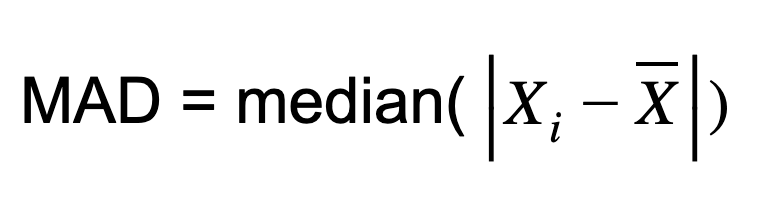

In [37]:
from scipy import stats

# MAD method
def mad_method(df, variable_name):
    #Takes two parameters: dataframe & variable of interest as string
    columns = df.columns
    med = np.median(df, axis = 0)
    mad = np.abs(stats.median_absolute_deviation(df))
    threshold = 3
    outlier = []
    index=0
    for item in range(len(columns)):
        if columns[item] == variable_name:
            index == item
    for i, v in enumerate(df.loc[:,variable_name]):
        t = (v-med[index])/mad[index]
        if t > threshold:
            outlier.append(i)
        else:
            continue
    return outlier

In [38]:
col_threshold = []
for col in year_month_list:
    outliers = mad_method(pivot_voice_usage_info, int(col))
    outlier_cols = pivot_voice_usage_info[int(col)].iloc[outliers]
    col_threshold.append({col: {"threshold" :min(outlier_cols), "count":len(outliers)}})
    print()
    print(f"Outliers for {col}---->\n", outlier_cols)
    print(len(outliers))

<ipython-input-37-ab658f4f8d27>:8: DeprecationWarning: `median_absolute_deviation` is deprecated, use `median_abs_deviation` instead!

To preserve the existing default behavior, use
`scipy.stats.median_abs_deviation(..., scale=1/1.4826)`.
The value 1.4826 is not numerically precise for scaling
with a normal distribution. For a numerically precise value, use
`scipy.stats.median_abs_deviation(..., scale='normal')`.

  mad = np.abs(stats.median_absolute_deviation(df))



Outliers for 202011.0---->
 event_source.hash
0000b72cb5dd05389b70e07ae2eaebd9    0.375000
002af514a5229bbdf7a8b507d031a335    0.375000
004ad601241b94a13e8ee6bca4a72a23    0.375000
007892e9a61ad519d55fa022e4a3e789    0.375000
013a505fcc8806a94c23701589e3bc50    0.375000
                                      ...   
fef52d9e0b916cd367689607f9bd54ed    0.437500
ff12000153bc1123a1cdc591ffc691e1    0.375000
ff393b70c8d6e77dcd2ff3f5209104b7    0.375000
ff72d9fbd338562c3ebe6072eabd90c6    0.375000
ffc1a9ad19dee13d434acadcae8ee290    0.546875
Name: 202011.0, Length: 1032, dtype: float64
1032

Outliers for 202012.0---->
 event_source.hash
0000b72cb5dd05389b70e07ae2eaebd9    0.375000
0016ec2f6efbbed697df640415dbce7c    0.375000
004ad601241b94a13e8ee6bca4a72a23    0.375000
007892e9a61ad519d55fa022e4a3e789    0.375000
0111aa7d39527b8f4d3ada7307406432    0.437500
                                      ...   
ff393b70c8d6e77dcd2ff3f5209104b7    0.375000
ff72d9fbd338562c3ebe6072eabd90c6    0.375000
f

In [39]:
col_threshold

[{202011.0: {'threshold': 0.375, 'count': 1032}},
 {202012.0: {'threshold': 0.375, 'count': 1218}},
 {202101.0: {'threshold': 0.375, 'count': 1276}},
 {202102.0: {'threshold': 0.3571428571428571, 'count': 3433}},
 {202103.0: {'threshold': 0.375, 'count': 1249}},
 {202104.0: {'threshold': 0.375, 'count': 1047}},
 {202105.0: {'threshold': 0.375, 'count': 1271}},
 {202106.0: {'threshold': 0.375, 'count': 1106}},
 {202107.0: {'threshold': 0.375, 'count': 2284}}]

In [40]:
sum_outlier = 0
for col in col_threshold:
    for key,val in col.items():
        sum_outlier += val["threshold"]
avg_outlier = sum_outlier / len(col_threshold)
pivot_voice_usage_info["Outlier"]=pivot_voice_usage_info.apply(lambda x : "YES" if x["Usage_Rating_Scaled"]> avg_outlier else "NO", axis=1)
print(avg_outlier)

0.373015873015873


In [41]:
# labling usage bins
bins = [0, 0.2, 0.4,1]
labels = ['LOW','MEDIUM','HIGH']
pivot_voice_usage_info['Usage_Rating_Categorical'] = pd.cut(pivot_voice_usage_info['Usage_Rating_Scaled'], bins=bins, labels=labels)
pivot_voice_usage_info

year-month,202011.0,202012.0,202101.0,202102.0,202103.0,202104.0,202105.0,202106.0,202107.0,Usage_Rating_Scaled,Outlier,Usage_Rating_Categorical
event_source.hash,,,,,,,,,,,,
59186358517212700922248718974976,0.062500,0.093750,0.062500,0.071429,0.062500,0.062500,0.015625,0.015625,0.062500,0.056548,NO,LOW
000084a38b0fa5ca77e7989aa5eb2d06,0.140625,0.187500,0.250000,0.160714,0.140625,0.140625,0.140625,0.062500,0.062500,0.142857,NO,LOW
0000b72cb5dd05389b70e07ae2eaebd9,0.375000,0.375000,0.375000,0.428571,0.375000,0.375000,0.375000,0.375000,0.375000,0.380952,YES,MEDIUM
0000d6128ae38e7c002db48acdb1515d,0.062500,0.062500,0.031250,0.214286,0.062500,0.031250,0.031250,0.062500,0.062500,0.068948,NO,LOW
0001220457bf95593a9f85d1a00aaa8b,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.093750,0.093750,0.020833,NO,LOW
...,...,...,...,...,...,...,...,...,...,...,...,...
fffc95756b7dccbd011d78c8a7d41e6b,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.093750,0.010417,NO,LOW
fffdd1950a0cc6eb6e701bb732abadac,0.093750,0.125000,0.140625,0.214286,0.125000,0.187500,0.125000,0.093750,0.140625,0.138393,NO,LOW
fffdede40561fb7b84c4c3941dec8e79,0.140625,0.140625,0.140625,0.160714,0.187500,0.093750,0.187500,0.140625,0.187500,0.153274,NO,LOW


In [42]:
# adding category "NO" 
pivot_voice_usage_info['Usage_Rating_Categorical'] = pivot_voice_usage_info['Usage_Rating_Categorical'].cat.add_categories("NO")
pivot_voice_usage_info.loc[pivot_voice_usage_info['Usage_Rating_Scaled'] == 0.0, 'Usage_Rating_Categorical'] = "NO"
pivot_voice_usage_info[(pivot_voice_usage_info['Usage_Rating_Scaled'] == 0.0)]

year-month,202011.0,202012.0,202101.0,202102.0,202103.0,202104.0,202105.0,202106.0,202107.0,Usage_Rating_Scaled,Outlier,Usage_Rating_Categorical
event_source.hash,,,,,,,,,,,,


### Fina Result: Usage Ratings

In [43]:
pivot_voice_usage_info

year-month,202011.0,202012.0,202101.0,202102.0,202103.0,202104.0,202105.0,202106.0,202107.0,Usage_Rating_Scaled,Outlier,Usage_Rating_Categorical
event_source.hash,,,,,,,,,,,,
59186358517212700922248718974976,0.062500,0.093750,0.062500,0.071429,0.062500,0.062500,0.015625,0.015625,0.062500,0.056548,NO,LOW
000084a38b0fa5ca77e7989aa5eb2d06,0.140625,0.187500,0.250000,0.160714,0.140625,0.140625,0.140625,0.062500,0.062500,0.142857,NO,LOW
0000b72cb5dd05389b70e07ae2eaebd9,0.375000,0.375000,0.375000,0.428571,0.375000,0.375000,0.375000,0.375000,0.375000,0.380952,YES,MEDIUM
0000d6128ae38e7c002db48acdb1515d,0.062500,0.062500,0.031250,0.214286,0.062500,0.031250,0.031250,0.062500,0.062500,0.068948,NO,LOW
0001220457bf95593a9f85d1a00aaa8b,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.093750,0.093750,0.020833,NO,LOW
...,...,...,...,...,...,...,...,...,...,...,...,...
fffc95756b7dccbd011d78c8a7d41e6b,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.093750,0.010417,NO,LOW
fffdd1950a0cc6eb6e701bb732abadac,0.093750,0.125000,0.140625,0.214286,0.125000,0.187500,0.125000,0.093750,0.140625,0.138393,NO,LOW
fffdede40561fb7b84c4c3941dec8e79,0.140625,0.140625,0.140625,0.160714,0.187500,0.093750,0.187500,0.140625,0.187500,0.153274,NO,LOW


In [44]:
pivot_voice_usage_info.to_csv("data/user_profile/VOICE_INCOMING_Usage_Categorical.csv")